In [ ]:
%pip install pandas numpy matplotlib tensorflow keras

In [ ]:
%pip install xlrd

In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

Using TensorFlow backend.


In [ ]:
train_data = pd.read_excel(r"./data/Data_Train.xlsx", sheet_name="Sheet1")

In [ ]:
train_data = train_data.dropna(how='any',axis=0)
train_data = train_data.to_numpy()

In [ ]:
train_data[:,0] = np.vectorize(lambda i: str(i.split(" ")[0]))(train_data[:,0]).astype(str)

In [ ]:
# assume `Price` in Lakh
data_params = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

In [ ]:
def one_hot_encode(data:np.ndarray, n:int, categories:list = None) -> np.ndarray:
    """
    Convert the given input into one-hot-encoding.
    Use the given categories, if exist then convert the data,
    else convert indices to one-hot
    """

    try:
        assert categories is None
        data = data.astype(int)
    except (ValueError, AssertionError):
        data = np.vectorize(categories.index)(data)
    finally:
        targets = np.array(data).reshape(-1)
    
    return int(list(np.eye(n)[targets][0]).index(1))

In [ ]:
one_encode_params = ["Name", "Location", "Year", "Fuel_Type", "Transmission", "Owner_Type"]

def encode_params(data, params):
    ix = map(data_params.index, params) 
    encoded_params = {}

    for i in ix:
        m = data_params[i]
        encoded_params[m] = [np.unique(data[:,i].astype(str), axis=0).tolist(), None]
        
        if i == "Year":
            encoded_params[m][1] = np.vectorize(lambda x: 2020 - x)(data[:,i])
        else:
            data[:,i] = encoded_params[m][1] = list(map(lambda x: one_hot_encode(x, len(encoded_params[m][0]), encoded_params[m][0]), data[:,i].astype(str)))
    
    return encoded_params

In [ ]:
categories = encode_params(train_data, one_encode_params)

In [ ]:
def convert_prices(price):
    p = price.split(" ")
    price = float(p[0])
    cr = p[1] == "Cr"

    return price if not cr else 100*price

train_data[:,11] = np.vectorize(convert_prices)(train_data[:,11]).astype(float)

In [ ]:
# km/kg = kmpl
train_data[:,7] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,7]).astype(float)

In [ ]:
train_data[:,8] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,8]).astype(float)
train_data[:,9] = np.vectorize(lambda i: float(i.split(" ")[0]))(train_data[:,9]).astype(float)

In [22]:
train_data = train_data.astype(float)

array([[ 5.  ,  2.  ,  7.  , ...,  5.  ,  8.61,  4.5 ],
       [21.  ,  9.  , 12.  , ...,  8.  , 21.  , 17.5 ],
       [12.  ,  7.  , 14.  , ...,  5.  , 10.65,  9.95],
       ...,
       [12.  , 10.  , 12.  , ...,  5.  ,  9.93,  7.43],
       [ 5.  ,  4.  ,  9.  , ...,  5.  ,  6.63,  3.2 ],
       [12.  ,  4.  , 10.  , ...,  5.  ,  7.88,  4.75]])

No handles with labels found to put in legend.


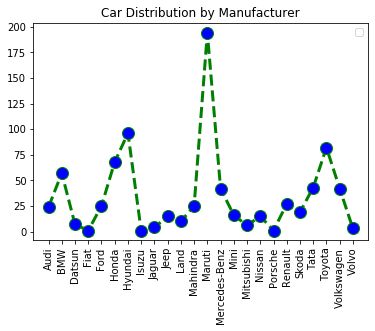

In [67]:
# distribution by brand
x = np.unique(train_data[:,0], axis=0)
y = list(map(lambda x: sum(train_data[:,0] == x), x))

plt.xticks(x, categories['Name'][0], fontsize=10, rotation=90)
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title('Car Distribution by Manufacturer') 
plt.legend() 
plt.show()


No handles with labels found to put in legend.
3.91 229.99999999999997 23.087193195625762


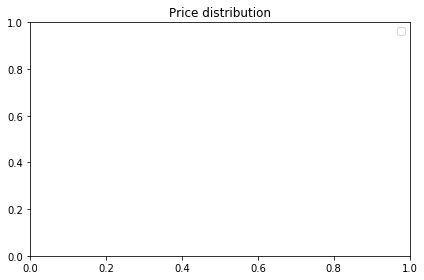

In [129]:
x = train_data[:,11]
x = list(range(np.min(x)))
#y = list(map(lambda i: sum(train_data[:,11]==i), x))
#plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Price distribution') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


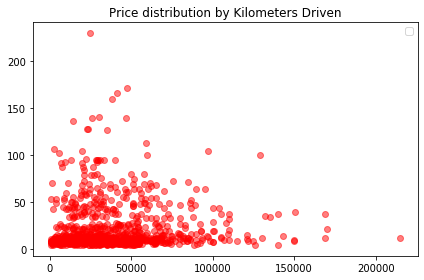

In [72]:
x = train_data[:,3]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Price distribution by Kilometers Driven') 
plt.legend() 
plt.tight_layout()
plt.show()

aasas

No handles with labels found to put in legend.


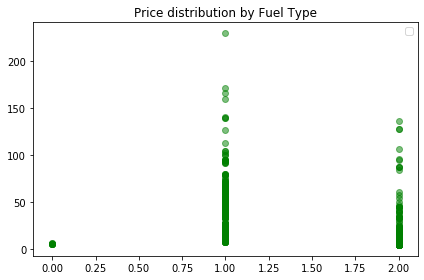

In [77]:
x = train_data[:,4]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='green', alpha=0.5)
plt.title('Price distribution by Fuel Type') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


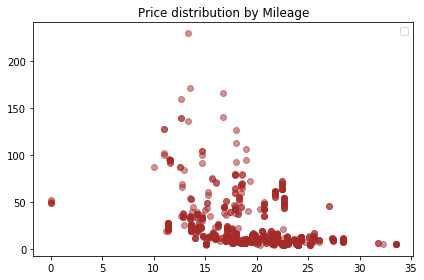

In [79]:
x = train_data[:,7]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='brown', alpha=0.5)
plt.title('Price distribution by Mileage') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


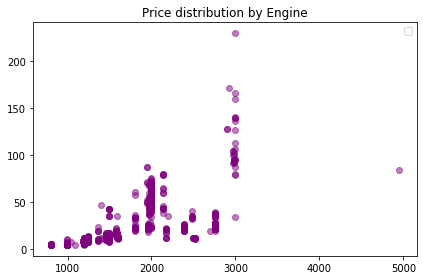

In [80]:
x = train_data[:,8]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Price distribution by Engine') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


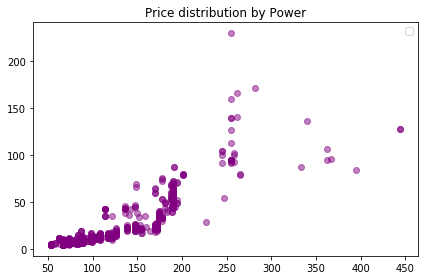

In [81]:
x = train_data[:,9]
tot = len(train_data[:,11])
y = train_data[:,11]

plt.scatter(x, y, color='purple', alpha=0.5)
plt.title('Price distribution by Power') 
plt.legend() 
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


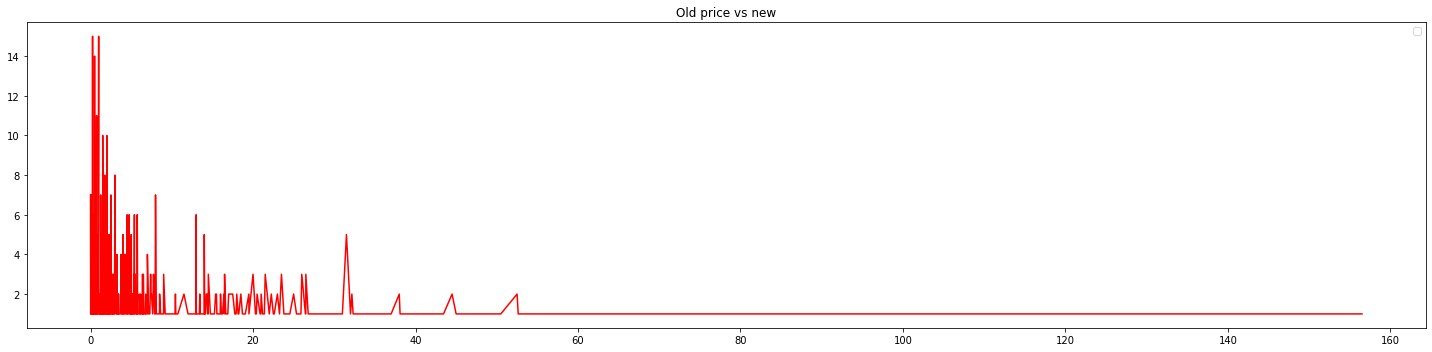

In [118]:
x = train_data[:,12]
y = list(map(lambda x: abs(x[0]-y[1]), zip(x, train_data[:,11])))
x = np.unique(y)

plt.figure(figsize=(20, 5))

plt.plot(x, list(map(y.count, x)), color='red')
plt.title('Old price vs new') 
plt.legend() 
plt.tight_layout()
plt.show()

In [ ]:
def getTrainData():
    return [], []

trainX, trainY = getTrainData()

In [ ]:
def build_model(inputShape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=inputShape))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output_n))

    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
model = build_model(trainX[0].shape, trainY[0].shape[0])

In [ ]:
model.summary()

In [ ]:
model.fit(trainX, trainY, epochs=1000)

In [ ]:
train_data[22]

In [ ]:
example_predict = np.array(trainX[33:46])
prediction = model.predict(example_predict)
prediction, trainY[33:46]